# Advanced Certification in AIML
## A Program by IIIT-H
The objective of this experiment is to understand word2vec.
In this experiment we will use **Mahabharata** as our text corpus

#### Importing the required packages

In [ ]:
#vector space modeling and topic modeling toolkit
import gensim

# Operating System
import os

# Regular Expression
import re

# nltk packages
from nltk.stem.snowball import SnowballStemmer

# Basic Packages
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# PCA from scikit learn
from sklearn.decomposition import PCA

In [ ]:
!ls

M1_DL_MB2VEC2.ipynb  MB2Vec_Without_stemmer.bin  MB.txt       stopwords.txt
MB2Vec.bin	     MB2Vec_With_stemmer.bin	 sample_data  word2vec.png


In [ ]:
model = gensim.models.Word2Vec.load('MB2Vec_Without_stemmer.bin')
#model = gensim.models.Word2Vec.load('MB2Vec_With_stemmer.bin')

In [ ]:
krishna5 = model.wv.most_similar('krishna')[:5]
for name, similarity in krishna5:
  print("Name: {} similarity: {}".format(name, round(similarity,2)))

Name: kesava similarity: 0.88
Name: vasudeva similarity: 0.82
Name: nala similarity: 0.8
Name: govinda similarity: 0.74
Name: madhava similarity: 0.74


In [ ]:
arjuna5 = model.wv.most_similar('arjuna')[:5]
for name, similarity in arjuna5:
  print("Name: {} similarity: {}".format(name, round(similarity,2)))

Name: partha similarity: 0.9
Name: dhananjaya similarity: 0.86
Name: kama similarity: 0.84
Name: salya similarity: 0.83
Name: bhima similarity: 0.83


In [ ]:
virata5 = model.wv.most_similar('virata')[:5]
for name, similarity in virata5:
  print("Name: {} similarity: {}".format(name, round(similarity,2)))


Name: panchala similarity: 0.88
Name: drupada similarity: 0.87
Name: duhsasana similarity: 0.85
Name: twins similarity: 0.85
Name: nakula similarity: 0.85


In [ ]:
words_list = [] #np.array([])
vector_list =[] #np.array([])
print(len(model.wv.vocab))
for i in model.wv.vocab:
    #try :
        words_list.append(i)
        vector_list.append(model[i])
    #except :
    #    pass
    
words_list=np.array(words_list)
vector_list=np.array(vector_list)
print(vector_list.shape,words_list.shape)
vector_list = vector_list.reshape(len(model.wv.vocab), -1)
print(vector_list.shape)
print(words_list[:5])
print(vector_list[0])

1864
(1864, 100) (1864,)
(1864, 100)
['original' 'text' 'king' 'thou' 'hast']
[ 0.10591703  0.11072537  0.09023888 -0.0210696  -0.27914014  0.4307274
 -0.15017948  0.09893571 -0.29030254 -0.19116187  0.00226485  0.02568228
 -0.13955557  0.01971332 -0.10852176  0.03047267 -0.19157818  0.42182624
 -0.08246224 -0.02487629 -0.27755737  0.7843399   0.18752691 -0.23491813
  0.15974417  0.2571485  -0.23066688  0.03373548  0.05961284  0.40081868
  0.4150131  -0.34176707 -0.04298875  0.14409421 -0.00276539  0.12176047
 -0.0841397   0.08302723 -0.10030815 -0.33098072  0.1340728   0.19234265
 -0.16649649  0.20268638 -0.04638767  0.06321446  0.10805321  0.19875818
 -0.30152225 -0.05329386 -0.07241584  0.08227935  0.14119165 -0.00426028
  0.28609514 -0.39315066  0.03727203 -0.2956322   0.14164713  0.3574658
 -0.11652929  0.24543743 -0.6961225   0.27358252  0.2743496   0.00119314
  0.18458992  0.08544466  0.5029684   0.14778215  0.1978774  -0.21220566
 -0.14880095 -0.28871983 -0.25522488  0.30471405

In [ ]:
vector_list.shape

(1864, 100)

In [ ]:
pca = PCA(n_components=2)
pca.fit(vector_list)
compressed_list =pca.transform(vector_list)

In [ ]:
compressed_list.shape

(1864, 2)

Now, let us find the location of some characters in word_list to get the locations.

In [ ]:
characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
locs = [np.where(words_list == x)[0][0] for x in characters]
print(locs)

[1781, 1780, 1643, 15, 1320, 1623, 1303, 223, 1815, 1714, 1481, 1801, 1656, 1755]


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

To get more sense of what actually we did till now. let us visualize the data

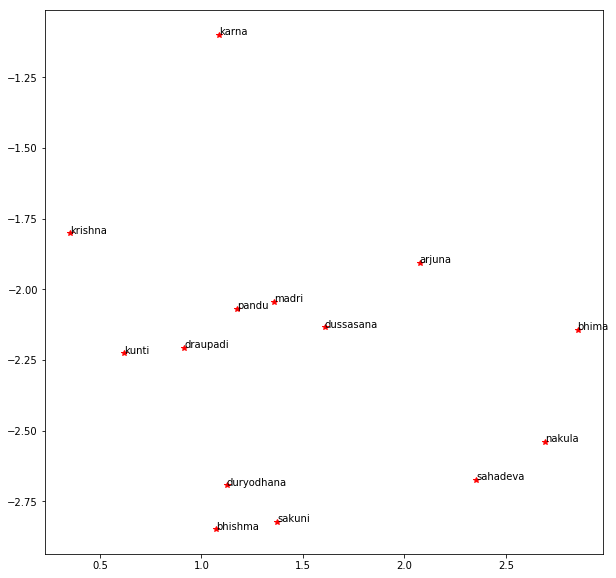

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for character, pos in zip(characters, locs):
    m = model[character]
    value = pca.transform([m])[0]
    ax.plot(value[0], value[1], "r*")
    ax.annotate(words_list[pos], xy=value, xytext=value)
plt.show()
fig.savefig('word2vec.png')

Now let us see the most similar characters related to characters list as show below

#### characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']

In [ ]:
for character in characters:
    near = model.most_similar(character)[:5]
    nearNames = [x[0] for x in near]
    print(character, ':'.join(nearNames), sep="\t")

dussasana	sakuni:duhsasana:jayadratha:chitrasena:vikarna
sakuni	dussasana:duhsasana:uncle:jayadratha:salya
duryodhana	dussasana:sakuni:jayadratha:suyodhana:duhsasana
bhishma	vaisampayana:salya:sanjaya:sauti:kama
krishna	kesava:vasudeva:nala:govinda:madhava
madri	draupadi:drupada:suvala:subhadra:twin
pandu	pritha:kunti:radha:suta:subhadra
kunti	pritha:radha:pandu:suta:suvala
karna	bhagadatta:vikarna:yuyudhana:duhsasana:kritavarman
bhima	bhimasena:vrikodara:ghatotkacha:dhananjaya:abhimanyu
arjuna	partha:dhananjaya:kama:salya:bhima
nakula	sahadeva:twins:chitrasena:vikarna:sikhandin
sahadeva	nakula:twins:chitrasena:duhsasana:sikhandin
draupadi	madri:drupada:maternal:suvala:dhritarashtra
